# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#1

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
#2

reg1 = sm.OLS(y,X).fit()

tips['res1'] = reg1.resid

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.64e-20
Time:                        13:25:42   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg1 = smf.ols('tip ~ net_bill', tips).fit()

tips['res1'] = reg1.resid

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        13:25:42   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

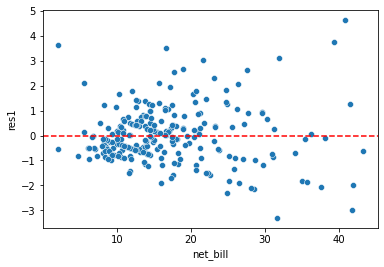

In [7]:
#3

sns.scatterplot(x = 'net_bill', y = 'res1', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.40e-20
Time:                        13:25:42   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

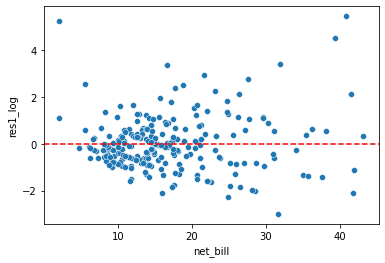

In [8]:
#4

#log

reg1_log = smf.ols('tip ~ np.log(net_bill)', tips).fit()
tips['res1_log'] = reg1_log.resid
print(reg1_log.summary())

sns.scatterplot(x = 'net_bill', y = 'res1_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.47e-20
Time:                        13:25:43   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

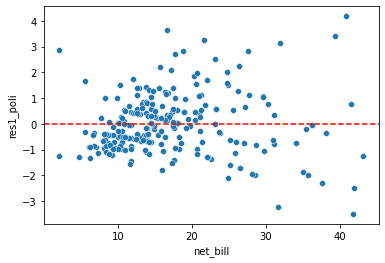

In [9]:
#polinômio

reg1_poli = smf.ols('tip ~ np.power(net_bill,2)', tips).fit()
tips['res1_poli'] = reg1_poli.resid
print(reg1_poli.summary())

sns.scatterplot(x = 'net_bill', y = 'res1_poli', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

No título do exercício II diz que é pra fazer o modelo no valor percentual da gorjeta (```tip_pct```), mas no passo a passo se refere ao valor da gorjeta (```tip```). na dúvida fiz dos dois.

In [10]:
#1

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [11]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [12]:
reg2 = sm.OLS(y,X).fit()

tips['res2'] = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.21e-18
Time:                        13:25:43   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#2

reg2 = smf.ols('np.log(tip) ~ net_bill', tips).fit()

tips['res2'] = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.60e-21
Time:                        13:25:43   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

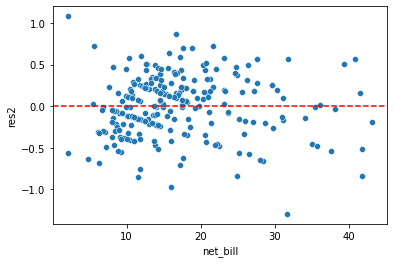

In [14]:
#3

sns.scatterplot(x = 'net_bill', y = 'res2', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.62e-22
Time:                        13:25:44   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

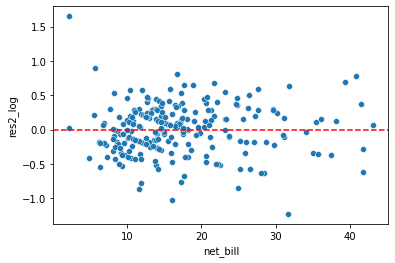

In [15]:
#4

reg2_log = smf.ols('np.log(tip) ~ np.log(net_bill)', tips).fit()
tips['res2_log'] = reg2_log.resid
print(reg2_log.summary())

sns.scatterplot(x = 'net_bill', y = 'res2_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           2.82e-22
Time:                        13:25:44   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

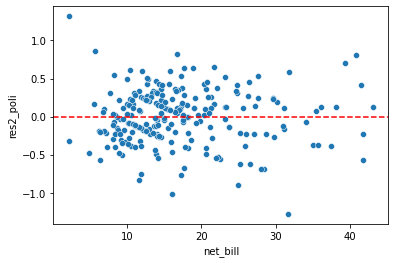

In [16]:
reg2_poli = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', tips).fit()
tips['res2_poli'] = reg2_poli.resid
print(reg2_poli.summary())

sns.scatterplot(x = 'net_bill', y = 'res2_poli', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
#5

tips['pred_tip'] = np.exp(reg2_poli.fittedvalues)

tips[['pred_tip', 'tip']].corr().iloc[0,1]**2

0.3290849111468204

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [18]:
df = pd.read_csv('previsao_de_renda.csv')
df.dropna()
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [19]:
#1

reg3 = smf.ols('renda ~ tempo_emprego', df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:25:45   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

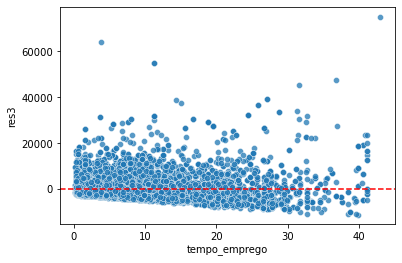

In [20]:
#2

df['res3'] = reg3.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res3', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [21]:
#3

reg_multi = smf.ols('''renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao 
                       + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau''', df).fit()

df['res_multi'] = reg_multi.resid

reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:25:46   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
sexo[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
posse_de_veiculo[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
posse_de_imovel[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
tipo_renda[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
tipo_renda[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
tipo_renda[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
tipo_renda[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
educacao[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
educacao[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
educacao[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
educacao[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
estado_civil[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
estado_civil[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
estado_civil[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
estado_civil[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
tipo_residencia[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
tipo_residencia[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
tipo_residencia[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
tipo_residencia[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
tipo_residencia[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
mau[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                        -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                               29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                      299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia              308.7311    788.615      0.391      0.695   -1237.077    1854.539
==============================================================================
Omnibus:                    10075.338   Durbin-Watson:                   2.

In [32]:
#4

reg_multi = smf.ols('''np.log(renda) ~ sexo + posse_de_imovel + tipo_renda 
                     + idade + tempo_emprego''', df).fit()

df['res_multi'] = reg_multi.resid

print(reg_multi.summary())



                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     481.8
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:47:11   Log-Likelihood:                -13249.
No. Observations:               12466   AIC:                         2.652e+04
Df Residuals:                   12457   BIC:                         2.658e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

<AxesSubplot:xlabel='sexo', ylabel='res_multi'>

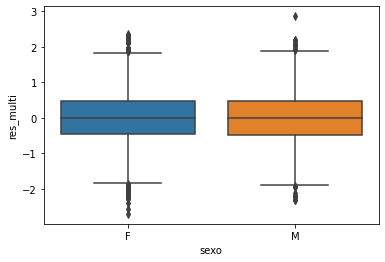

In [33]:
#5

sns.boxplot(x = 'sexo', y = 'res_multi', data = df)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='res_multi'>

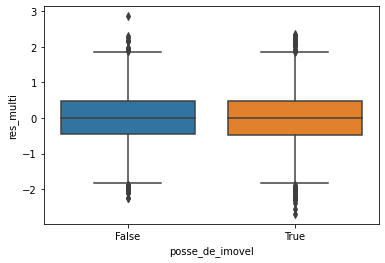

In [34]:
sns.boxplot(x = 'posse_de_imovel', y = 'res_multi', data = df)

<AxesSubplot:xlabel='tipo_renda', ylabel='res_multi'>

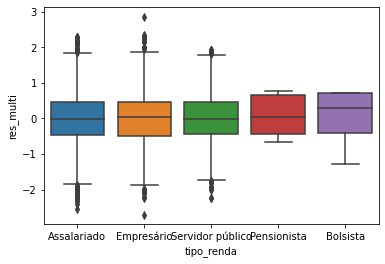

In [35]:
sns.boxplot(x = 'tipo_renda', y = 'res_multi', data = df)

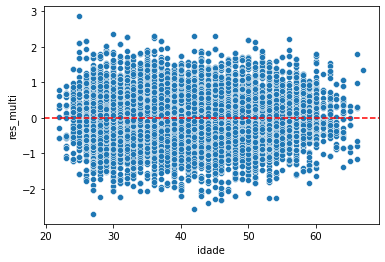

In [27]:
sns.scatterplot(x = 'idade', y = 'res_multi', data = df)
plt.axhline(y=0, color='r', linestyle='--')

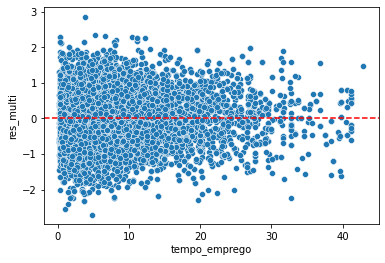

In [26]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_multi', data = df)
plt.axhline(y=0, color='r', linestyle='--')